# **WATER POTABILITY PREDICTION**



*   Monitoring the quality of water and testing it regularly is very important to maintain reliable and safe water sources and eliminate the potential health risks related to water contamination.

*   Potable water is used for drinking and cooking.it free from unpleasent odors,tastes and color.








*   Turbidity is the measure of relative clarity of a liquid.
*   water hardness is the amount of dissolved calcium and magnesium in the water.

*   Total solids are dissolved solids plus suspended and settleable solids in water. In stream water, dissolved solids consist of calcium, chlorides, nitrate, phosphorus, iron, sulfur, and other ions particles that will pass through a filter with pores of around 2 microns

*   Water has a neutral pH of 7, which indicates that it is neither acidic or basic. The scale ranges from 0 (very acidic) to 14 (very basic). It is normal for water to have a range of between 6.5 and 8.5 on the scale.
*   Chloramines are a group of chemical compounds that contain chlorine and ammonia. The particular type of chloramine used in drinking water disinfection is called monochloramine which is mixed into water at levels that kill germs but are still safe to drink


*   At high levels, sulfate can give water a bitter or medicinal taste and can have laxative effects.

*   Conductivity is a measure of the ability of water to pass an electrical current. Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases.

*   Total organic carbon is a measure of the amount of organic compounds contained in a water sample.A high organic content means an increase in the growth of microorganisms which contribute to the depletion of oxygen supplies
*   Trihalomethanes (THMs) are widespread disinfection by-products (DBPs) in drinking water, and long-term exposure has been consistently associated with increased bladder cancer risk.








# **Import necessary libraries and data**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report,ConfusionMatrixDisplay,roc_curve,auc,roc_auc_score,accuracy_score


import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/study/project1-water-potability -prediction/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# **Exploratory Data Analysis(EDA)**

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**check missing values**

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Handle Missing values**

In [ ]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())


In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Seperate X and y**

In [ ]:
X=df.iloc[:,:-1]
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [ ]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

# **Data visualization**

# matplotlib

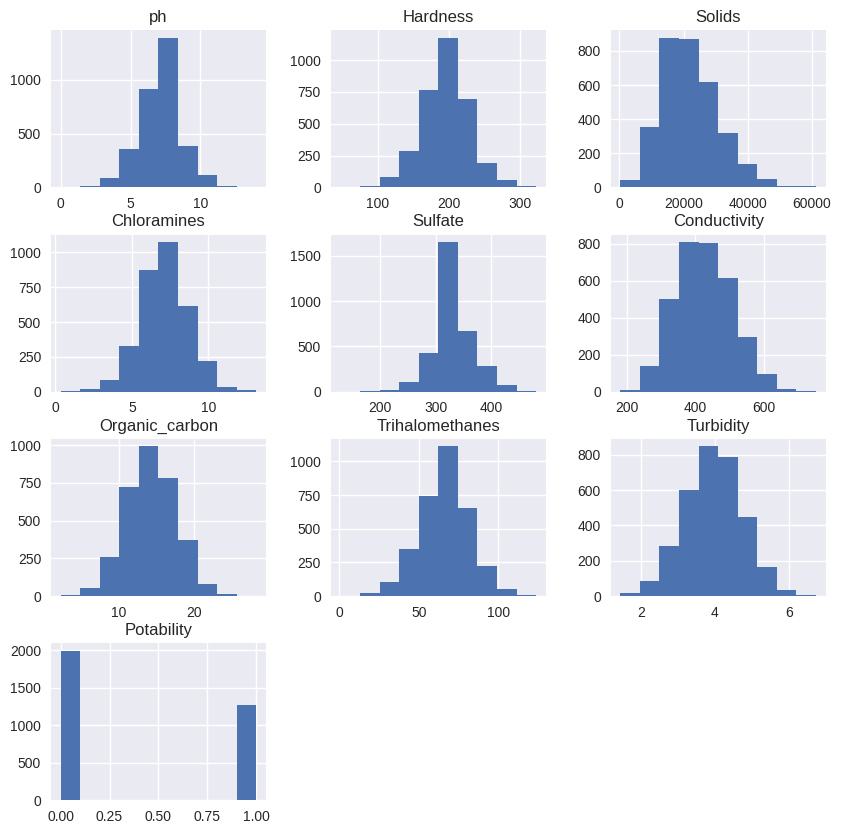

In [ ]:
df.hist(figsize=(10,10))
plt.show()

# seaborn

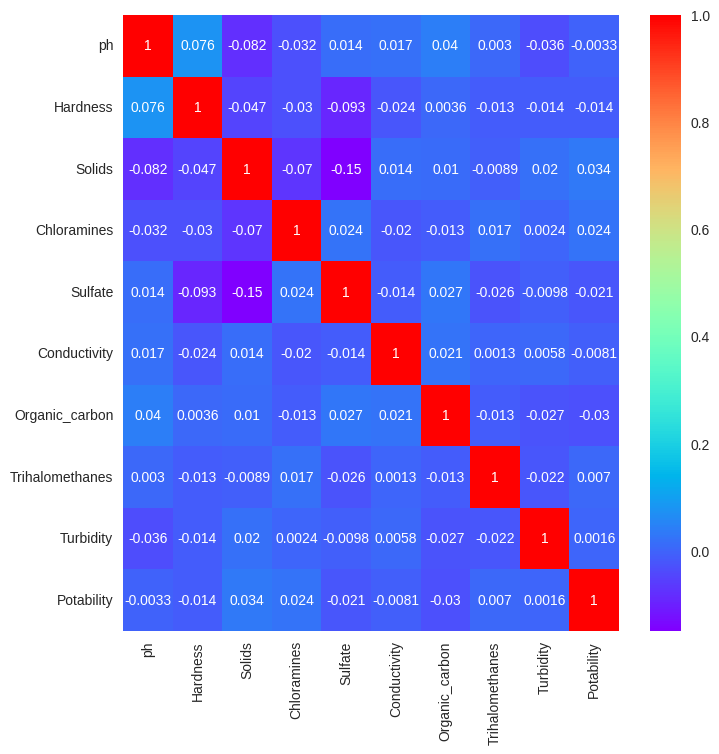

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='rainbow') #cmap=colormap
plt.show()

countplot

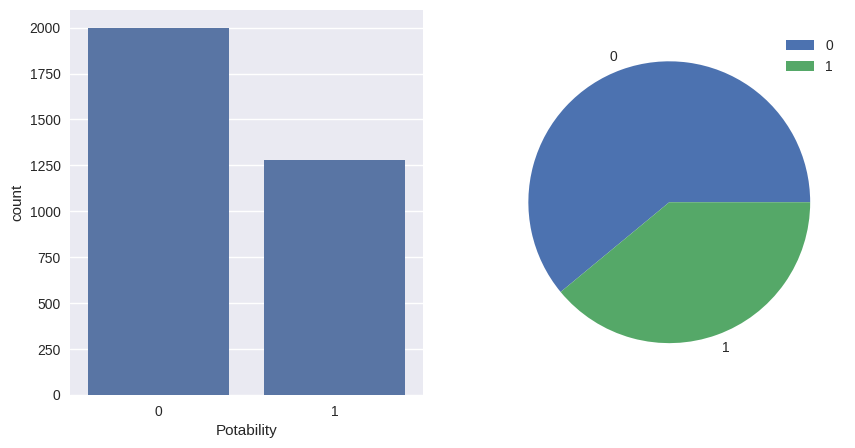

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Potability',data=df)

plt.subplot(1,2,2)
a=df['Potability'].value_counts()
plt.pie(a,labels=[0,1])
plt.legend()
plt.show()

from above graph ,the count of 0 is higher than 1.that means not potable water is higher than potable.also we get the dataset is imbalanced data

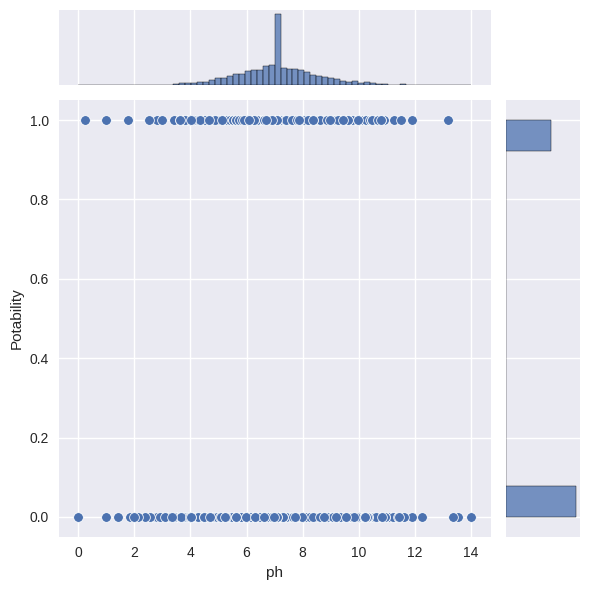

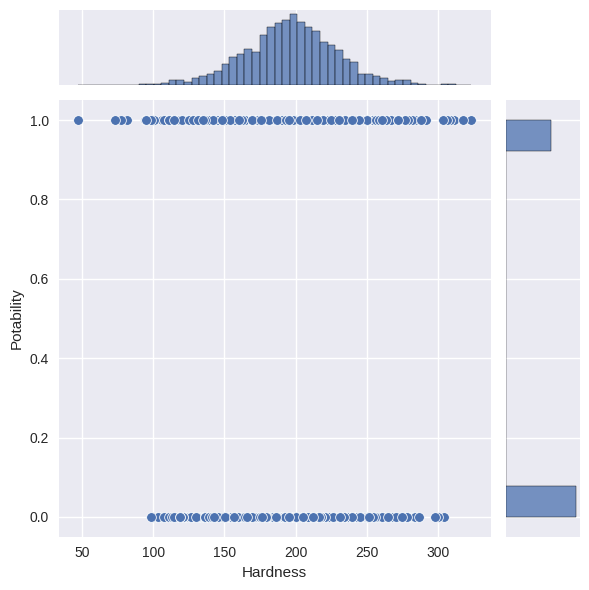

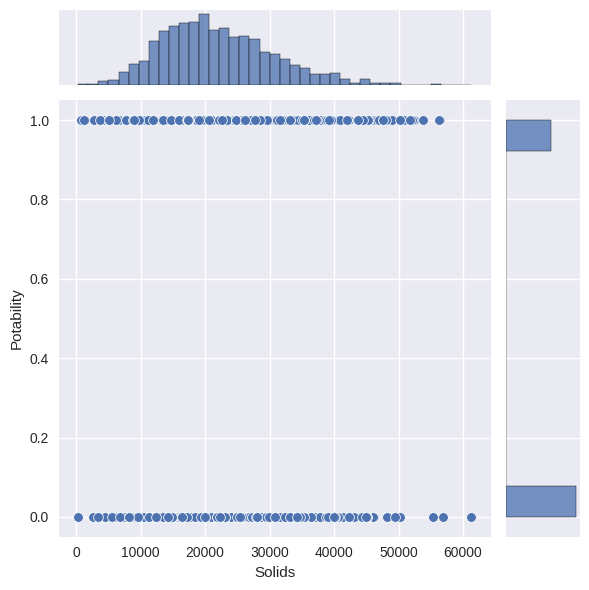

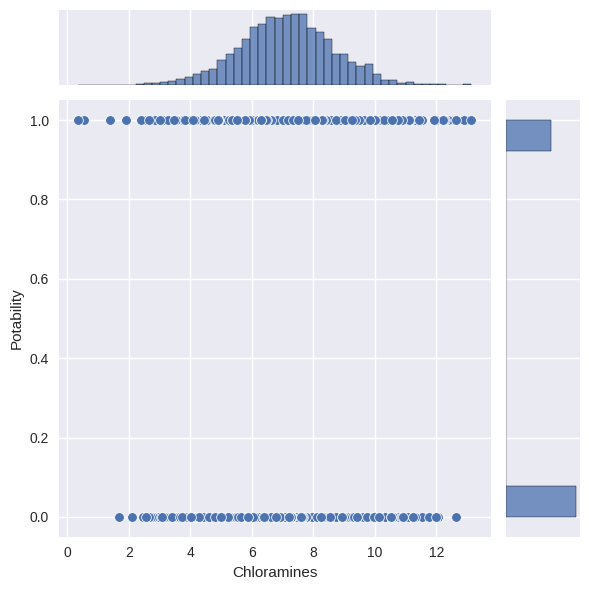

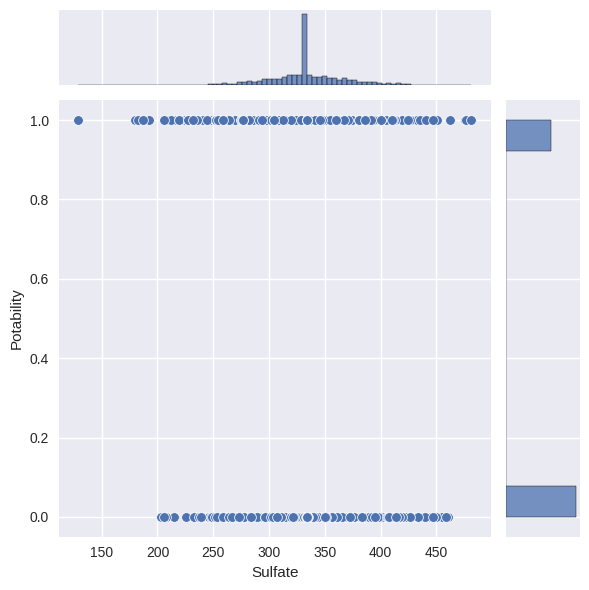

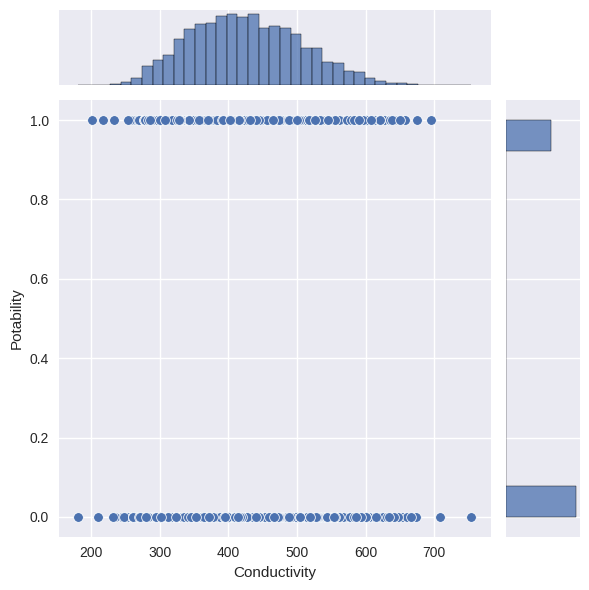

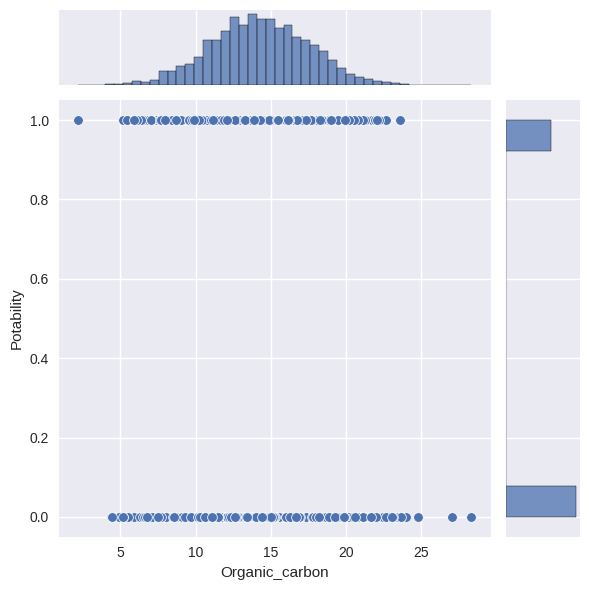

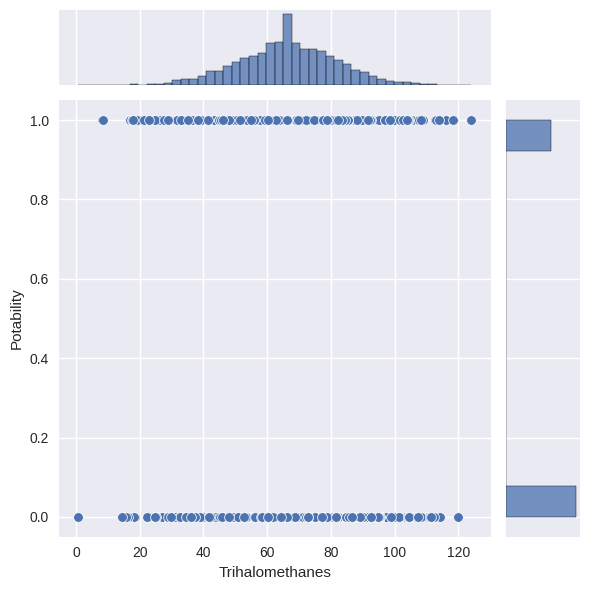

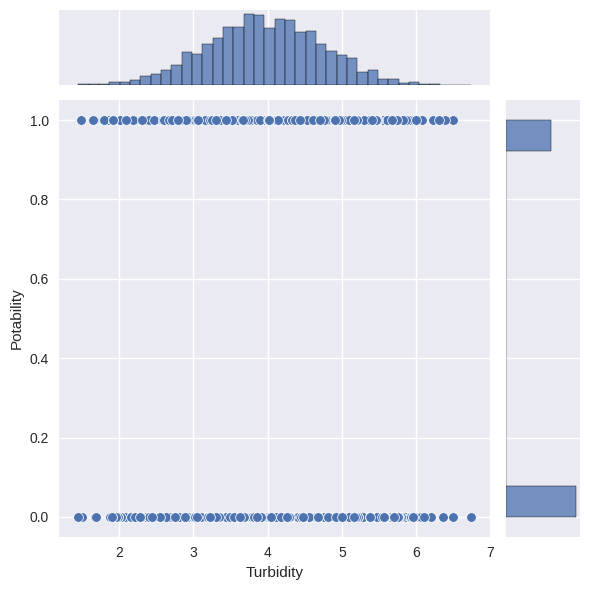

In [ ]:

sns.jointplot(x='ph',y='Potability',data=df)

sns.jointplot(x='Hardness',y='Potability',data=df)

sns.jointplot(x='Solids',y='Potability',data=df)

sns.jointplot(x='Chloramines',y='Potability',data=df)

sns.jointplot(x='Sulfate',y='Potability',data=df)

sns.jointplot(x='Conductivity',y='Potability',data=df)

sns.jointplot(x='Organic_carbon',y='Potability',data=df)

sns.jointplot(x='Trihalomethanes',y='Potability',data=df)

sns.jointplot(x='Turbidity',y='Potability',data=df)



# **Scaling using MinMaxScaler**

In [ ]:
m=MinMaxScaler()
X_s=m.fit_transform(X)
X_s

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

# **splitting data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_s,y,test_size=0.3,random_state=1)

# **model creation with using Default parameters**

In [ ]:
k=KNeighborsClassifier(n_neighbors=5)
s=SVC(kernel='rbf')
g=GaussianNB()
d=DecisionTreeClassifier(criterion='entropy')
r=RandomForestClassifier(random_state=1)
a=AdaBoostClassifier()
x=XGBClassifier()
gr=GradientBoostingClassifier()
lists=[]
l=[k,s,g,d,r,a,x,gr]
for i in l:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  lists.append(accuracy_score(y_test,y_pred)*100)
  print(accuracy_score(y_test,y_pred)*100)


  # print(classification_report(y_test,y_pred))


KNeighborsClassifier()
61.241098677517805
SVC()
65.41200406917599
GaussianNB()
61.953204476093596
DecisionTreeClassifier(criterion='entropy')
59.0030518819939
RandomForestClassifier(random_state=1)
65.20854526958291
AdaBoostClassifier()
59.61342828077314
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_stat

In [ ]:
data=pd.DataFrame(lists,index=['KNN','SVC','NB','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['default parameters'])
data

,default parameters
KNN,61.241099
SVC,65.412004
NB,61.953204
DECISIONTREE,59.003052
RANDOMFOREST,65.208545
ADABOOST,59.613428
XGB,62.868769
GRADIENT,62.970498


# **hyperparameter tuning**

In [ ]:
#KNeighbors
# p={'n_neighbors':[1,3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
# clf=GridSearchCV(k,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)


In [ ]:
#SVC
# p={'kernel':['linear','poly','rbf']}
# clf=GridSearchCV(s,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

In [ ]:
#Decisiontree
# p={'criterion':['gini', 'entropy'],'max_depth':[2,3,4,5,6],'random_state':[1,2,3,4,5]}
# clf=GridSearchCV(d,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

In [ ]:
#Randomforsest
# p={'n_estimators':[100,150,200],'max_depth':[1,2,3,4,5],'random_state':[1,2,3,4,5]}
# clf=GridSearchCV(r,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

In [ ]:
#AdaBoost
# p={'n_estimators':[100,150,200],'random_state':[1,2,3,4,5]}
# clf=GridSearchCV(a,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

In [ ]:
#gradient
# p={'n_estimators':[100,150,200],'max_depth':[1,2,3,4,5],'random_state':[1,2,3,4,5]}
# clf=GridSearchCV(gr,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

In [ ]:
#XGB
# p={'n_estimators':[100,150,200],'max_depth':[1,2,3,4,5],'random_state':[1,2,3,4,5]}
# clf=GridSearchCV(x,p,cv=5,scoring='accuracy')
# clf.fit(X_train,y_train)
# print(clf.best_params_)

# **model creation using hyperparameter tuning**

In [ ]:
k1=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s1=SVC(kernel='rbf')
d1=DecisionTreeClassifier(max_depth=6,random_state=5,criterion='entropy')
r1=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a1=AdaBoostClassifier(n_estimators=100,random_state=1)
x1=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr1=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists1=[]
l1=[k1,s1,d1,r1,a1,x1,gr1]
for i in l1:
  print(i)
  i.fit(X_train,y_train)
  y_pred1=i.predict(X_test)
  lists1.append(accuracy_score(y_test,y_pred1)*100)
  print(accuracy_score(y_test,y_pred1)*100)
  # print(classification_report(y_test,y_pred1))

KNeighborsClassifier(n_neighbors=9, weights='distance')
62.05493387589013
SVC()
65.41200406917599
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5)
62.76703967446592
RandomForestClassifier(max_depth=5, random_state=4)
62.56358087487284
AdaBoostClassifier(n_estimators=100, random_state=1)
60.223804679552394
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estima

In [ ]:
data1=pd.DataFrame(lists1,index=['KNN','SVC','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['hyperparameter '])
data1

,hyperparameter
KNN,62.054934
SVC,65.412004
DECISIONTREE,62.767040
RANDOMFOREST,62.563581
ADABOOST,60.223805
XGB,63.784334
GRADIENT,63.682604


# **oversampling**

increase the number of minority samples in the dataset

In [ ]:
o=SMOTE(random_state=1)
X_os,y_os=o.fit_resample(X,y)

In [ ]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
y_os.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [ ]:
X_o=m.fit_transform(X_os)
X_o

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.55130697, 0.48054537, 0.46044472, ..., 0.52076671, 0.61092043,
        0.45663706],
       [0.46389233, 0.50396345, 0.58342833, ..., 0.43962246, 0.54357076,
        0.41480097],
       [0.32957159, 0.48696713, 0.30116148, ..., 0.44771604, 0.57160918,
        0.40349809]])

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_o,y_os,test_size=0.3,random_state=1)

**oversampling with default parameter's **

In [ ]:
k_o=KNeighborsClassifier(n_neighbors=3)
s_o=SVC(kernel='rbf')
g_o=GaussianNB()
d_o=DecisionTreeClassifier(criterion='entropy')
r_o=RandomForestClassifier(random_state=1)
a_o=AdaBoostClassifier()
x_o=XGBClassifier()
gr_o=GradientBoostingClassifier()
lists2=[]
l_o=[k_o,s_o,g_o,d_o,r_o,a_o,x_o,gr_o]
for i in l_o:
  print(i)
  i.fit(X_train1,y_train1)
  y_pred_o=i.predict(X_test1)
  lists2.append(accuracy_score(y_test1,y_pred_o)*100)
  print(accuracy_score(y_test1,y_pred_o)*100)
  # print(classification_report(y_test1,y_pred_o))

KNeighborsClassifier(n_neighbors=3)
66.4720600500417
SVC()
67.13928273561301
GaussianNB()
56.38031693077564
DecisionTreeClassifier(criterion='entropy')
60.71726438698916
RandomForestClassifier(random_state=1)
72.47706422018348
AdaBoostClassifier()
60.30025020850709
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, 

In [ ]:
data2=pd.DataFrame(lists2,index=['KNN','SVC','NB','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['oversampling'])
data2

,oversampling
KNN,66.472060
SVC,67.139283
NB,56.380317
DECISIONTREE,60.717264
RANDOMFOREST,72.477064
ADABOOST,60.300250
XGB,65.304420
GRADIENT,64.887406


**oversampling with hyperparameter **

In [ ]:
k2=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s2=SVC(kernel='rbf')
d2=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=5,splitter='random')
r2=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a2=AdaBoostClassifier(n_estimators=100,random_state=1)
x2=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr2=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists3=[]
l2=[k2,s2,d2,r2,a2,x2,gr2]
for i in l2:
  print(i)
  i.fit(X_train1,y_train1)
  y_pred2=i.predict(X_test1)
  lists3.append(accuracy_score(y_test1,y_pred2)*100)
  print(accuracy_score(y_test1,y_pred2)*100)
  # print(classification_report(y_test1,y_pred2))

KNeighborsClassifier(n_neighbors=9, weights='distance')
65.97164303586321
SVC()
67.13928273561301
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5,
                       splitter='random')
55.87989991659717
RandomForestClassifier(max_depth=5, random_state=4)
62.63552960800667
AdaBoostClassifier(n_estimators=100, random_state=1)
59.966638865721436
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
 

In [ ]:
data3=pd.DataFrame(lists3,index=['KNN','SVC','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['oversamplig-hyperparameter '])
data3

,oversamplig-hyperparameter
KNN,65.971643
SVC,67.139283
DECISIONTREE,55.879900
RANDOMFOREST,62.635530
ADABOOST,59.966639
XGB,63.803169
GRADIENT,65.471226


# **undersampling**

decrease the number of majority samples in the dataset

In [ ]:
u=RandomUnderSampler(random_state=1)
X_us,y_us=u.fit_resample(X,y)

In [ ]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
y_us.value_counts()

0    1278
1    1278
Name: Potability, dtype: int64

In [ ]:
X_u=m.fit_transform(X_us)
X_u

array([[0.51475354, 0.36515796, 0.21798999, ..., 0.42447877, 0.58377683,
        0.4102081 ],
       [0.49238787, 0.68499219, 0.12958981, ..., 0.35979719, 0.73780185,
        0.62938328],
       [0.42578868, 0.47606058, 0.2807453 , ..., 0.54550633, 0.63874655,
        0.67741632],
       ...,
       [0.69041535, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36798551, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.57438193, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_u,y_us,test_size=0.3,random_state=1)

**undersampling with default parameter's **

In [ ]:
k_u=KNeighborsClassifier(n_neighbors=5)
s_u=SVC(kernel='rbf')
g_u=GaussianNB()
d_u=DecisionTreeClassifier(criterion='entropy')
r_u=RandomForestClassifier(random_state=1)
a_u=AdaBoostClassifier()
x_u=XGBClassifier()
gr_u=GradientBoostingClassifier()
lists4=[]
l_u=[k_u,s_u,g_u,d_u,r_u,a_u,x_u,gr_u]
for i in l_u:
  print(i)
  i.fit(X_train2,y_train2)
  y_pred_u=i.predict(X_test2)
  lists4.append(accuracy_score(y_test2,y_pred_u)*100)
  print(accuracy_score(y_test2,y_pred_u)*100)
  # print(classification_report(y_test2,y_pred_u))

KNeighborsClassifier()
53.84615384615385
SVC()
58.01825293350718
GaussianNB()
54.758800521512384
DecisionTreeClassifier(criterion='entropy')
55.80182529335072
RandomForestClassifier(random_state=1)
61.408083441981745
AdaBoostClassifier()
56.0625814863103
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_stat

In [ ]:
data4=pd.DataFrame(lists4,index=['KNN','SVC','NB','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['undersampling'])
data4

,undersampling
KNN,53.846154
SVC,58.018253
NB,54.758801
DECISIONTREE,55.801825
RANDOMFOREST,61.408083
ADABOOST,56.062581
XGB,55.671447
GRADIENT,58.539765


**undersampling with hyperparameter **

In [ ]:
k3=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s3=SVC(kernel='rbf')
d3=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=5,splitter='random')
r3=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a3=AdaBoostClassifier(n_estimators=100,random_state=1)
x3=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr3=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists5=[]
l3=[k3,s3,d3,r3,a3,x3,gr3]
for i in l3:
  print(i)
  i.fit(X_train2,y_train2)
  y_pred3=i.predict(X_test2)
  lists5.append(accuracy_score(y_test2,y_pred3)*100)
  print(accuracy_score(y_test2,y_pred3)*100)
  # print(classification_report(y_test2,y_pred3))

KNeighborsClassifier(n_neighbors=9, weights='distance')
56.32333767926988
SVC()
58.01825293350718
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5,
                       splitter='random')
53.58539765319426
RandomForestClassifier(max_depth=5, random_state=4)
56.32333767926988
AdaBoostClassifier(n_estimators=100, random_state=1)
53.45501955671447
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
  

In [ ]:
data5=pd.DataFrame(lists5,index=['KNN','SVC','DECISIONTREE','RANDOMFOREST','ADABOOST','XGB','GRADIENT'],columns=['undersamplig-hyperparameter '])
data5

,undersamplig-hyperparameter
KNN,56.323338
SVC,58.018253
DECISIONTREE,53.585398
RANDOMFOREST,56.323338
ADABOOST,53.455020
XGB,59.582790
GRADIENT,58.148631


In [ ]:
datas=pd.concat([data,data1,data2,data3,data4,data5],axis=1)
datas

,default parameters,hyperparameter,oversampling,oversamplig-hyperparameter,undersampling,undersamplig-hyperparameter
KNN,61.241099,62.054934,66.472060,65.971643,53.846154,56.323338
SVC,65.412004,65.412004,67.139283,67.139283,58.018253,58.018253
NB,61.953204,NaN,56.380317,NaN,54.758801,NaN
DECISIONTREE,59.003052,62.767040,60.717264,55.879900,55.801825,53.585398
RANDOMFOREST,65.208545,62.563581,72.477064,62.635530,61.408083,56.323338
ADABOOST,59.613428,60.223805,60.300250,59.966639,56.062581,53.455020
XGB,62.868769,63.784334,65.304420,63.803169,55.671447,59.582790
GRADIENT,62.970498,63.682604,64.887406,65.471226,58.539765,58.148631


# **Feature selection**

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [ ]:
# X=X.drop(['ph','Conductivity','Trihalomethanes','Turbidity'],axis=1)
# X

# **Feature selection output**
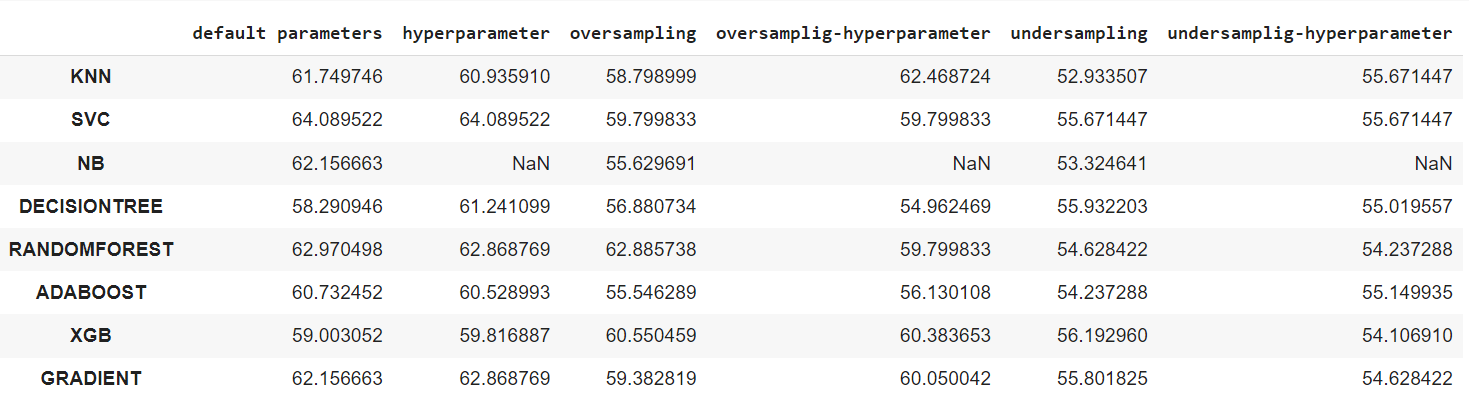

# **deploy model**

Here the best algorithm is Randomforestclassifier using oversampling with using default parameters.it gives 72% accuracy.so we select the model for deploy.





              precision    recall  f1-score   support

           0       0.71      0.74      0.73       593
           1       0.74      0.71      0.72       606

    accuracy                           0.72      1199
   macro avg       0.73      0.72      0.72      1199
weighted avg       0.73      0.72      0.72      1199



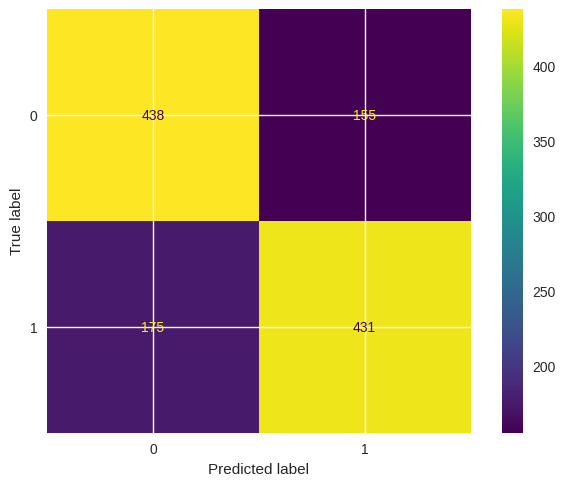

In [ ]:
ra=RandomForestClassifier(random_state=1)
ra.fit(X_train1,y_train1)
y_pred_r=ra.predict(X_test1)
print(classification_report(y_test1,y_pred_r))
print(ConfusionMatrixDisplay.from_predictions(y_test1,y_pred_r))

In [ ]:
# auc scores
auc_score = roc_auc_score(y_test1, y_pred_r)
print(auc_score)

0.7249191613933736


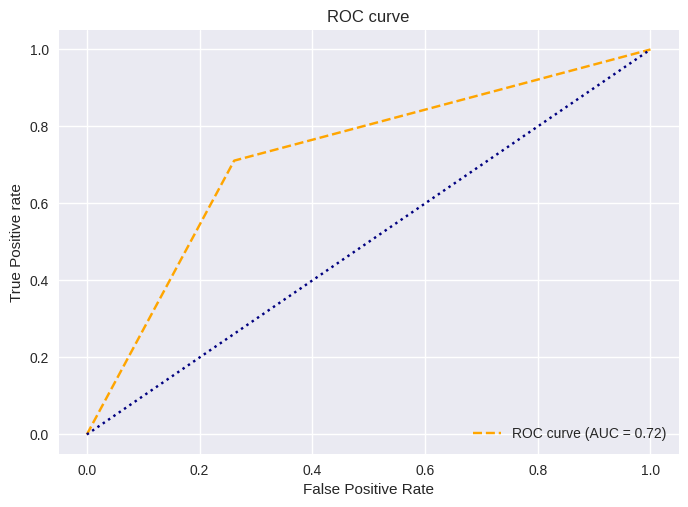

In [ ]:
# roc curve for model
fpr, tpr, thresh = roc_curve(y_test1, y_pred_r)
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy',  linestyle=':')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show();

In [ ]:
pickle.dump(ra,open('water1','wb'))
pickle.dump(m,open('scaler1','wb'))